# Linear Regression

## 머신러닝 학습 방법

### Supervised learning ( 지도학습 )
훈련 데이터로부터 하나의 함수를 유추

- Gradient descent based learning
- Probability theory based learning
- Information theroy based learning
- Distance similarity based learning

#### Gradient descent based learning
- 실제 값과 학습된 모델 예측치의 오차 최소화
- 모델의 최적 parameter 찾기가 목적


## normal equation

예측치 : $ \hat{y} = ax + b $  
실제 관측치 : $ y = ax + b + e $  

#### cost function : 실제값과 가설함수 차이


- cost function
![cost function](../img/cost_function.png)

![미분](../img/one_varaible.png)

#### weights의 최적값 컴퓨터가 찾는 방법
- 연립방정식 풀기
- gradient descent

#### normal equation

![normal_eq_1](../img/normal_eq_1.png)

![normal equation](../img/normal_equation.png)

![normal equation](../img/normal_equation_2.png)

$ w_0 는 상수항의 weight, w_1 은 x 계수의 weight $ 

- Iteration 등의 사용자 지정 Parameter가 없음  
- Feature 가 많아지면 계산 속도가 느려짐
- 역행렬이 존재하지 않을 경우 사용 못 함 ( 가우스 소거 시 0인 행, 열이 존재)


## Gradient Descent

#### 목적과 사용 이유
- cost function의 최소값 찾기 (cost function이란 실제 데이터 값과 회귀선과의 차이)
- 실제 미분계수를 계산하는 과정을 컴퓨터로 구현하는 것에 비해 gradient descent는 컴퓨터로 비교적 쉽게 구현할 수 있기 때문
  
- 처음 initial $\theta$ 를 설정해서 회귀선을 만든 후 cost function의 최소값을 찾으며 최적의 $\theta$ 를 찾아가는 과정

- 해당 구간의 경사값이 0이 되는 지점을 찾는다

$ x_{new} = x_{old} - \alpha \times (f(x_{old})') $

In [ ]:
x = 5
derivative = []
y = []
for i in range(100): # iterator 횟수 사용자가 지정해줘야 함
    old_value = x
    y.append(old_value ** 2) # x^2 
    derivative.append(old_value - 0.01 * 2 * old_value) # 0.01도 사용자 지정
    x = old_value - 0.01 * 2 * old_value

- learning rate 과 loop에 따라 달라짐
- learning rate 작을 경우
  - loop이 충분하지 못 할 경우 최적값에 도달 못 함
- learning rate 클 경우
  - 최적값을 못 찾고 데이터가 튀어서 수렴을 못 함

![Linear regression with GD](../img/linear_regression.png)

Simultaneously 임이 중요

- Learning rate, Iteration 횟수 등 Parameter 지정
- Feature 가 많으면 Normal equation에 비해 상대적으로 빠름
- 최적값에 수렴하지 않을 수도 있음

### GD로 Linear Regression 구현해보기

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("data/slr06.csv")
df.head()

,X,Y
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


In [4]:
raw_X = df["X"].values.reshape(-1, 1) # 2 dimension
y = df["Y"].values

In [12]:
np.ones((len(raw_X),1))[:5]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [11]:
X = np.concatenate((np.ones((len(raw_X),1)), raw_X), axis=1)


In [29]:
w = np.random.normal((2,1)) # 정규분포로 부터 (2,1)형태의 어레이
w

array([3.15647936, 0.52651831])

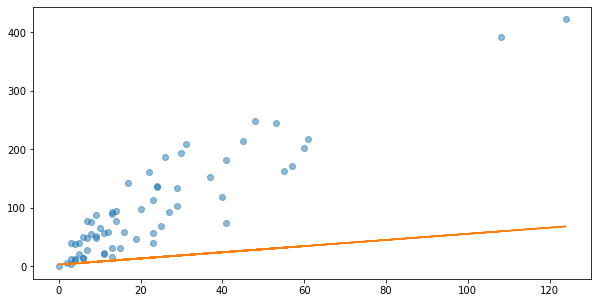

In [31]:
plt.figure(figsize=(10,5)) # fig 인스턴스 생성
plt.plot(raw_X,y, 'o', alpha=0.5) # 원형 마커의 투명도는 0.5인 라인 플롯을 그림( defalult 는 실선)

y_predict = np.dot(X, w)
plt.plot(raw_X,y_predict)

### Gradient Descent 구현

$ f(x) = h_\theta(x) $

In [32]:
def hypothesis_function(X, theta):
    return X.dot(theta)

In [33]:
def cost_function(h, y):
    return (1/(2*len(y))) * np.sum((h-y)**2)

In [34]:
h = hypothesis_function(X, w)  # 1열을 가진 벡터 형태
cost_function(h, y)

6304.399696799067

gredient_descent를 통해 theta를 구한 뒤 hypothesis_function와 cost_function을 이용해 값을 구함

In [ ]:
def gradient_descent(X, y, w, alpha, iterations):
    theta = w
    m = len(y)
    
    theta_list = [theta.tolist()]
    cost = cost_function(hypothesis_function(X, theta), y)
    cost_list = [cost]

    for i in range(iterations):
        t0 = theta[0] - (alpha / m) * np.sum(np.dot(X, theta) - y)
        t1 = theta[1] - (alpha / m) * np.sum((np.dot(X, theta) - y) * X[:,1])
        theta = np.array([t0, t1])
        
        if i % 10== 0:
            theta_list.append(theta.tolist())
            cost = cost_function(hypothesis_function(X, theta), y)
            cost_list.append(cost)


    return theta, theta_list, cost_list

In [ ]:
# Do Linear regression with GD
iterations = 10000
alpha = 0.001

theta, theta_list, cost_list = gradient_descent(X, y, w, alpha, iterations)
cost = cost_function(hypothesis_function(X, theta), y)

print("theta:", theta)
print('cost:', cost_function(hypothesis_function(X, theta), y))

### Multivariate linear regression models 

![simult_update](../img/simult_update.png)